In [135]:
import pandas as pd ## Preparador de datos
import matplotlib.pyplot as plt ### Visualizador
import missingno as msno ### Para ver valores faltantes
import numpy as np ## Calculos matriciales
import seaborn as sns ### Estilizador y formateador de imagenes
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder


# INFORMACION SHAPEFILE

In [9]:
# # Cargar un archivo de datos geoespaciales (por ejemplo, un shapefile)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Mostrar las primeras filas de los datos
# print(world.head())

# # Visualizar el mapa
# world.plot()
# plt.show()

# CARGA PLANOS ANTIOQUIA

In [136]:
shapefile_path = 'C:\\Users\\JohanStivenPaezBermu\\OneDrive - Asulado\\Python\\Python_MSc\\Tesis\\ESE_Capacidad_Instalada\\ESE_Capacidad_Instalada.shp'

# Carga el Shapefile
Ant = gpd.read_file(shapefile_path)

# Ahora puedes trabajar con los datos cargados, como imprimir las primeras filas
print(Ant.head())

   OBJECTID COD_MPIO             MPIO_NOMBR COD_ZONA COD_SUBREG        REGION  \
0         1    05761               SOPETRÁN      Z14       SR06  CORANTIOQUIA   
1         2    05425                  MACEO      Z05       SR03  CORANTIOQUIA   
2         3    05501                  OLAYA      Z14       SR06  CORANTIOQUIA   
3         4    05264             ENTRERRIOS      Z11       SR05  CORANTIOQUIA   
4         5    05042  SANTA FE DE ANTIOQUIA      Z14       SR06  CORANTIOQUIA   

         SUBREGION                ZONA TERRIT_CAR    Shape__Are  \
0        OCCIDENTE         Cauca Medio  Hevexicos  2.190716e+08   
1  MAGDALENA MEDIO                 Nus   Zenufana  3.871259e+08   
2        OCCIDENTE         Cauca Medio  Hevexicos  8.698619e+07   
3            NORTE  Río Grande y Chico   Tahamies  2.141959e+08   
4        OCCIDENTE         Cauca Medio  Hevexicos  5.256017e+08   

      Shape__Len                                           geometry  
0   93728.014660  POLYGON ((826004.851 1

In [6]:
# region_seleccionada = Ant[Ant['COD_MPIO'] == '05001']
# # Crea una figura de Matplotlib
# fig, ax = plt.subplots()

# # Dibuja todas las regiones
# Ant.plot(ax=ax, color='lightgrey')

# # Resalta la región seleccionada
# region_seleccionada.plot(ax=ax, color='white', edgecolor='red')

# plt.show()

In [7]:
# Ant.plot()
# plt.show()

# CODIGO QUE ME UNIFICA TODOS LOS CSV EN UNO SOLO DF, Y POSTERIORMENTE ME GUARDA EN UNO SOLO

In [39]:
# CODIGO QUE ME UNIFICA TODOS LOS CSV EN UNO SOLO DF, Y POSTERIORMENTE ME GUARDA EN UNO SOLO
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta = 'C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\DANE_2011_2024\\Expo_2011\\Expo_2011\\CSV_2011'

# Lista para almacenar los DataFrames de cada archivo CSV
dataframes = []

# Iterar sobre todos los archivos en la carpeta
for i, archivo in enumerate(os.listdir(carpeta)):
    if archivo.endswith('.csv'):
        # Leer el archivo CSV y agregarlo a la lista de DataFrames
        ruta_archivo = os.path.join(carpeta, archivo)
        if i == 0:
            # Leer solo los títulos del primer archivo
            with open(ruta_archivo, 'rb') as file:
                df = pd.read_csv(file, nrows=1, encoding='latin1')
            columnas = df.columns.tolist()
            dataframes.append(df)
        else:
            # Leer los datos sin títulos para los archivos restantes
            with open(ruta_archivo, 'rb') as file:
                df = pd.read_csv(file, header=None, encoding='latin1')
            # Establecer los títulos del primer archivo al resto
            df.columns = columnas
            dataframes.append(df)


# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Imprimir el DataFrame final
print(df_final)


C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_7924\3369995112.py:24: DtypeWarning: Columns (0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None, encoding='latin1')
C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_7924\3369995112.py:24: DtypeWarning: Columns (0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None, encoding='latin1')
C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_7924\3369995112.py:24: DtypeWarning: Columns (0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None, encoding='latin1')
C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_7924\3369995112.py:24: DtypeW

        FECH  ADUA  PAIS  COD_PAI4  COD_SAL1  COD_SAL  DPTO2  VIA  BANDERA  \
0       1104     1   249       USA         0      AXM      5    4      169   
1       FECH  ADUA  PAIS  COD_PAI4  COD_SAL1  COD_SAL  DPTO2  VIA  BANDERA   
2       1108     3    23       DEU         3      BOG      5    4      249   
3       1108     3    23       DEU         3      BOG      5    4      249   
4       1108     3    23       DEU         3      BOG      5    4      249   
...      ...   ...   ...       ...       ...      ...    ...  ...      ...   
377361  1109    90   919       XCF        11      MDE     11    3      999   
377362  1109    90   919       XCF        11      MDE     11    3      999   
377363  1109    90   919       XCF        11      MDE     11    3      999   
377364  1109    90   919       XCF        11      MDE     11    3      999   
377365  1109    90   919       XCF        11      MDE     11    3      999   

        REGIM  ...    PBK    PNK    FOBDOL      FOBPES  AGRENA 

In [9]:
# Me consolidad en un solo archivo
df.to_csv('2011.csv', index=False)  # Aquí 'datos.csv' es el nombre del archivo donde se guardarán los datos


NameError: name 'df' is not defined

# CRECE ENTRE DATOS ATMOSFERICOS ANTIOQUIA VS MAPA

In [138]:
df_Atmos = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240310.csv")
df_Atmos = df_Atmos.rename(columns={'Código del municipio': 'COD_MPIO'})
print(df_Atmos['COD_MPIO'].dtype)
df_Atmos['COD_MPIO'] = df_Atmos['COD_MPIO'].apply(lambda x: '0' + str(x))


# BLOQEO TEMPORAL LA MIGRACION MIENTRAS HAGO EL MERGE, Y PODER VER LOS DATOS EN EL MAPA
#datos_Atm_Nympy = df_Atmos.values


C:\Users\JohanStivenPaezBermu\AppData\Local\Temp\ipykernel_27872\2298615109.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Atmos = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018_20240310.csv")


int64


In [139]:
# Convertir la columna 'columna_comun' de df1 al tipo de datos de la columna 'columna_comun' de df2
df_Atmos['COD_MPIO'] = df_Atmos['COD_MPIO'].astype(Ant['COD_MPIO'].dtype)

# Ahora puedes fusionar los DataFrames sin problemas
datos_relacionados = pd.merge(Ant, df_Atmos, on='COD_MPIO', how='left')

In [152]:
#datos_relacionados.shape
#df_Atmos.head(1).T

In [131]:
# CODIGO BUENO, lo utilice para ver datos.
# datos_relacionados.head(2).T
# df_Atmos.head(1).T


In [151]:
##Municios_Unicos = df_Atmos['COD_MPIO'].unique()
Municios_Unicos = datos_relacionados['Nombre de la estación'].unique()
Municios_Unicos
conteo = datos_relacionados['Nombre de la estación'].value_counts().reset_index()
#conteo.columns = ['Municipio', 'Cantidad']
#conteo
#conteo['Municipio']

In [132]:
# Codigo Bueno. Lo uso para mirar datos
##Municios_Unicos = df_Atmos['COD_MPIO'].unique()
# Municios_Unicos = datos_relacionados['COD_MPIO'].unique()
# Municios_Unicos


In [150]:
conteo = datos_relacionados['COD_MPIO'].value_counts().reset_index()
#conteo.columns = ['Municipio', 'Cantidad']
#conteo
#conteo['Municipio']



In [142]:
### PRUEBA DEL CONTEO
# fecha_especifica = '12/01/2011'  # Por ejemplo, la fecha que deseas filtrar
# df_filtrado = datos_relacionados[datos_relacionados['fecha'] == fecha_especifica]
# df_filtrado

conteo_por_tienda = datos_relacionados.groupby(['MPIO_NOMBR','Nombre de la estación']).size().reset_index(name='conteo_por_MPIO_NOMBR')
#conteo_por_vendedor = df_filtrado.groupby('Nombre de la estación').size().reset_index(name='conteo_por_Nombre de la estación')


# datos_dia_especifico = datos_relacionados[datos_relacionados['fecha'].dt.date == pd.to_datetime(fecha).date()]
# datos_dia_especifico.head(1).T
# Municios_Unicos = datos_relacionados['COD_MPIO'].unique()
# conteo_sensores = datos_relacionados.groupby(['MPIO_NOMBR', 'Nombre de la estación']).size().reset_index(name='conteo')
# conteo_sensores
# datos_dia_especifico = datos_relacionados[datos_relacionados['fecha'].dt.date == pd.to_datetime(fecha).date()]
# datos_dia_especifico.head(1).T
# Municios_Unicos = datos_relacionados['COD_MPIO'].unique()
# conteo_sensores = datos_relacionados.groupby(['MPIO_NOMBR', 'Nombre de la estación']).size().reset_index(name='conteo')
# conteo_sensores

In [133]:
# lo uso para ver datos
# conteo_por_tienda.shape
# conteo_por_tienda

In [149]:
df_valores_unicos = datos_relacionados.drop_duplicates(subset=['Nombre de la estación'])
#df_valores_unicos.head(2)

In [148]:
columna_especifica = 'COD_MPIO'  # Reemplaza 'mi_columna' con el nombre de tu columna específica
conteo_por_valor = df_valores_unicos[columna_especifica].value_counts()
conteo_por_valor = df_valores_unicos.iloc[0:]
#conteo_por_valor

In [147]:
conteo_por_grupo = conteo_por_valor.groupby(['COD_MPIO','MPIO_NOMBR']).size().reset_index(name='cantidad')
#conteo_por_grupo
#conteo_por_grupo['cantidad']
#conteo_por_grupo.shape

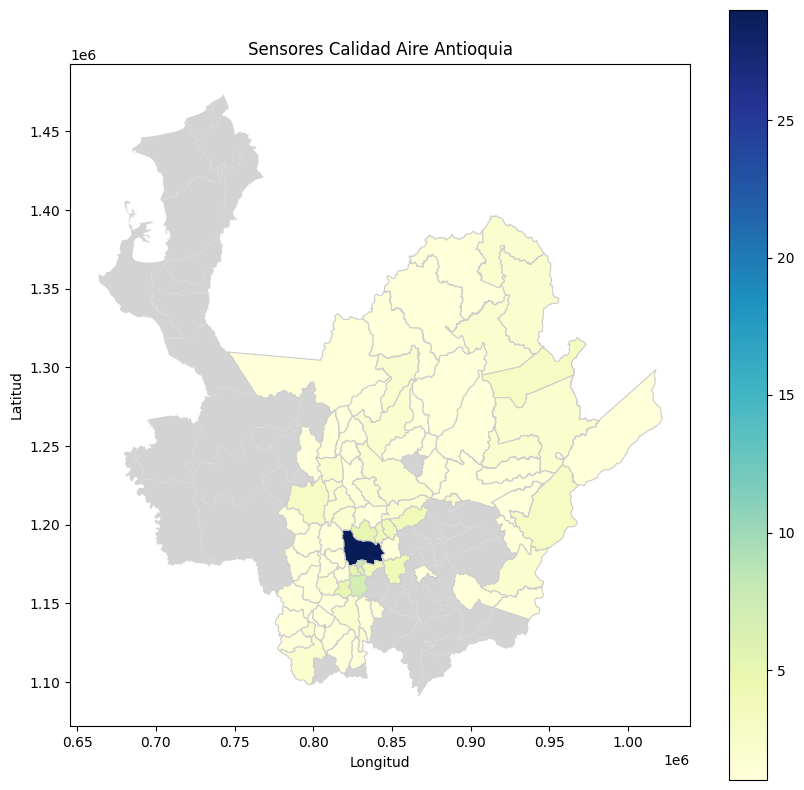

In [156]:
# # # import geopandas as gpd
# # # import pandas as pd
# # # import matplotlib.pyplot as plt

# # Datos en arrays de NumPy
# COD_MPIO = np.array(["05042", "05440", "05088", "05001"])
# #COD_MPIO = Municios_Unicos### DEBE TENER EL MISMO TAMAÑO de las ventas.
# ventas = np.array([25, 30, 35, 40])

# # Crear DataFrame
# ventas_data = pd.DataFrame({'COD_MPIO': COD_MPIO, 'Ventas': ventas})

# ventas_df = pd.DataFrame(ventas_data)
# ventas_geo = pd.merge(Ant, ventas_data, on="COD_MPIO", how="left")

# fig, ax = plt.subplots(figsize=(10, 10))
# Ant.plot(ax=ax, color='lightgrey') ### Nueva
# ventas_geo.plot(column="Ventas", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
# plt.title("Ventas por Área Geográfica")
# plt.xlabel("Longitud")
# plt.ylabel("Latitud")
# plt.show()

#######################################

# Datos en arrays de NumPy
#COD_MPIO = conteo_por_valor['COD_MPIO']
COD_MPIO = conteo_por_grupo['COD_MPIO']

#COD_MPIO = Municios_Unicos### DEBE TENER EL MISMO TAMAÑO de las ventas.
#ventas = np.array([25, 30, 35, 40])
Cantidad = conteo_por_grupo['cantidad'].values

# Crear DataFrame
numero_estaciones = pd.DataFrame({'COD_MPIO': COD_MPIO, 'cantidad': Cantidad})

ventas_df = pd.DataFrame(numero_estaciones)
ventas_geo = pd.merge(Ant, numero_estaciones, on="COD_MPIO", how="left")

fig, ax = plt.subplots(figsize=(10, 10))
Ant.plot(ax=ax, color='lightgrey') ### Nueva
ventas_geo.plot(column="cantidad", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
plt.title("Sensores Calidad Aire Antioquia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [155]:
conteo_por_grupo

,COD_MPIO,MPIO_NOMBR,cantidad
0,05001,MEDELLÍN,29
1,05030,AMAGÁ,5
2,05031,AMALFI,1
3,05034,ANDES,2
4,05036,ANGELÓPOLIS,1
...,...,...,...
77,05885,YALÍ,1
78,05887,YARUMAL,2
79,05890,YOLOMBÓ,1
80,05893,YONDÓ,1


# DATOS PRODUCCION AGRICOLA EN ANTIOQUIA

In [160]:
df_Agro = pd.read_csv("C:\\Users\\JohanStivenPaezBermu\\Downloads\\Datos_Tesis\\Agricultura_Antiquia_1990_2024\\Areas_cultivadas_y_produccion_agr_cola_en_Antioquia_desde_1990_20240310.csv")
# df_Atmos = df_Atmos.rename(columns={'Código del municipio': 'COD_MPIO'})
# print(df_Atmos['COD_MPIO'].dtype)
# df_Atmos['COD_MPIO'] = df_Atmos['COD_MPIO'].apply(lambda x: '0' + str(x))


df_Agro['Municipio'] = df_Agro['Municipio'].str.upper()
df_Agro.head(2)

,Tipo,Rubro,Subregion,Año,Municipio,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,ABEJORRAL,45.0,23.0,138.0
1,Permanentes,Aguacate,Urabá,1990,APARTADÓ,29.0,27.0,405.0


In [165]:
df_Agro = df_Agro.rename(columns={'Municipio': 'MPIO_NOMBR'})
df_Agro.head(2)

,Tipo,Rubro,Subregion,Año,MPIO_NOMBR,Área Total,Área Producción,Volumen Producción
0,Permanentes,Aguacate,Oriente,1990,ABEJORRAL,45.0,23.0,138.0
1,Permanentes,Aguacate,Urabá,1990,APARTADÓ,29.0,27.0,405.0


In [ ]:
df_Agro['COD_MPIO'] = None

In [170]:
# merge_Map_Agro = pd.merge(Ant, df_Agro, on="MPIO_NOMBR", how="left")
# merge_Map_Agro
for index, row in Ant.iterrows():
    id_a_buscar = row['MPIO_NOMBR']  # Suponiendo que 'id' es el nombre de la columna que contiene el ID a buscar
    
    # Buscar el ID en el segundo archivo
    df_Agro = df_Agro[df_Agro['MPIO_NOMBR'] == id_a_buscar]
    
    # Verificar si se encontró el ID en el segundo archivo
    if not df_Agro.empty:
        # Actualizar la información en el segundo archivo con la información del primer archivo
        df_Agro.loc[df_Agro['MPIO_NOMBR'] == id_a_buscar, 'informacion'] = row['COD_MPIO']



KeyError: 'MPIO_NOMBR'